In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

In [8]:
X_train[0].shape

(28, 28)

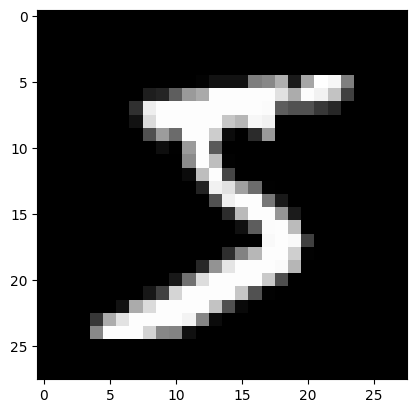

In [6]:
plt.imshow(X_train[0],cmap="gray")

## Model

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8610 - loss: 0.4801 - val_accuracy: 0.9562 - val_loss: 0.1535
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9603 - loss: 0.1342 - val_accuracy: 0.9638 - val_loss: 0.1163
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9752 - loss: 0.0860 - val_accuracy: 0.9692 - val_loss: 0.1030
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9814 - loss: 0.0634 - val_accuracy: 0.9704 - val_loss: 0.0973
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9747 - val_loss: 0.0847
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0337 - val_accuracy: 0.9742 - val_loss: 0.0915
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9927 - loss: 0.0261 - val_accuracy: 0.9737 - val_loss: 0.0888
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9946 - loss: 0.0199 - 

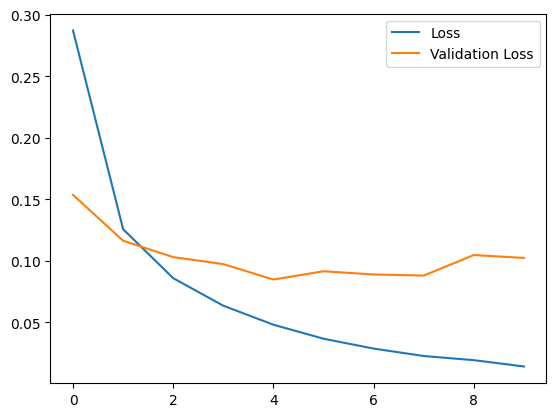

In [18]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [20]:
prediction = model.predict(X_test[14].reshape(1, 28, 28))
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Prediction: 1


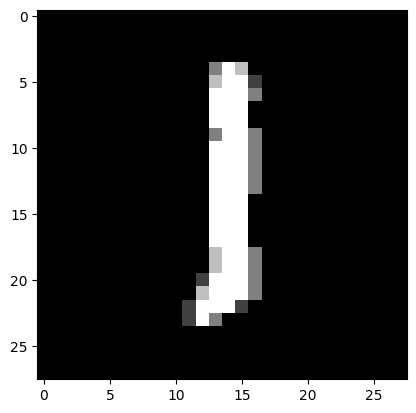

In [22]:
plt.imshow(X_test[14],cmap="gray")

## Callbacks

In [25]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

earlyStopping = EarlyStopping(monitor="val_loss",patience=5)
best_model = ModelCheckpoint("best_model.h5",save_best_only=True)

In [26]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2,callbacks=[earlyStopping,best_model])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9738 - val_loss: 0.1012
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9978 - loss: 0.0086 - val_accuracy: 0.9779 - val_loss: 0.0960
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9980 - loss: 0.0074 - val_accuracy: 0.9754 - val_loss: 0.1050
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9971 - loss: 0.0090 - val_accuracy: 0.9787 - val_loss: 0.0953
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9989 - loss: 0.0044 - val_accuracy: 0.9765 - val_loss: 0.1079
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9981 - loss: 0.0062 - val_accuracy: 0.9764 - val_loss: 0.1102
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9986 - loss: 0.0052 - val_accuracy: 0.9755 - val_loss: 0.1164
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9990 - loss: 0.0042 - 

## Learning rate

In [30]:
from sklearn.model_selection import train_test_split

initial_weights = model.get_weights()

train_sizes = [0.1, 0.25, 0.5, 0.75, 0.9]

train_accs = []
test_accs = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = train_test_split(
        X_train, y_train, train_size=train_size, stratify=y_train
    )

    model.set_weights(initial_weights)

    model.fit(
        X_train_frac,
        y_train_frac,
        epochs=10,
        verbose=0,
        callbacks=[EarlyStopping(monitor="loss", patience=1)]
    )

    train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)

    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accs.append(test_acc)

    print("✅ Done with size:", train_size)

print("Train accuracies:", train_accs)
print("Test accuracies:", test_accs)


✅ Done with size: 0.1
✅ Done with size: 0.25
✅ Done with size: 0.5
✅ Done with size: 0.75
✅ Done with size: 0.9
Train accuracies: [1.0, 1.0, 0.9986666440963745, 0.9987778067588806, 0.9991852045059204]
Test accuracies: [0.9778000116348267, 0.9775999784469604, 0.9772999882698059, 0.9764999747276306, 0.9789000153541565]


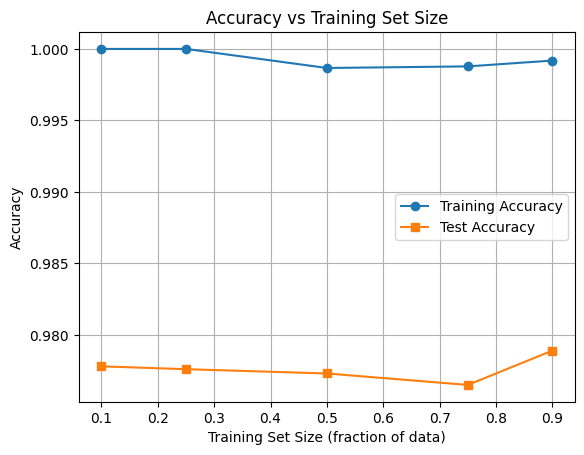

In [31]:
import matplotlib.pyplot as plt


plt.plot(train_sizes, train_accs, marker='o', label="Training Accuracy")
plt.plot(train_sizes, test_accs, marker='s', label="Test Accuracy")

plt.xlabel("Training Set Size (fraction of data)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training Set Size")
plt.legend()
plt.grid(True)
plt.show()


## Different Activation functions

In [33]:
activation_functions=["relu","leaky_relu","tanh","sigmoid"]
activation_results=[]
for act_fun in activation_functions:
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(128, activation= act_fun))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    history= history = model.fit(X_train,y_train,
                                 epochs=30,
                                 validation_split=0.2,
                                 callbacks=[earlyStopping,best_model],
                                 verbose=0)
    activation_results.append(history)

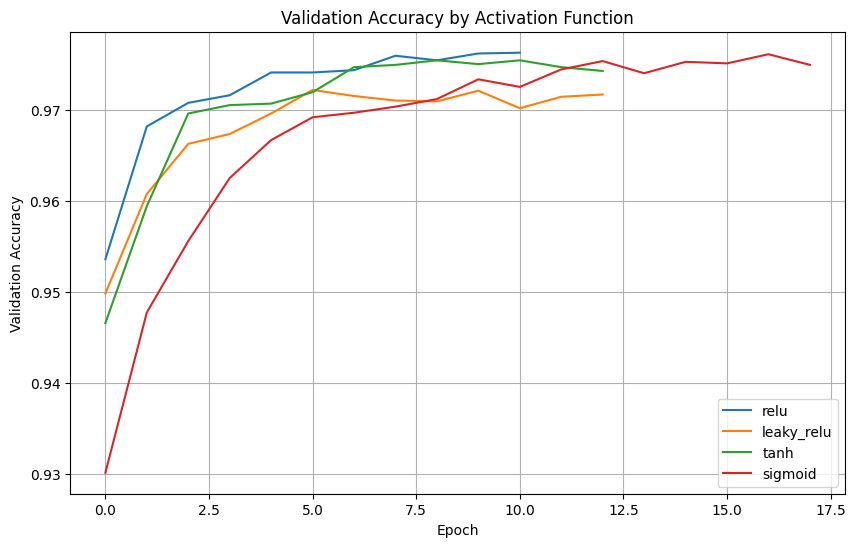

In [34]:

plt.figure(figsize=(10,6))

for act_fun, hist in zip(activation_functions, activation_results):
    plt.plot(hist.history['val_accuracy'], label=f"{act_fun}")

plt.title("Validation Accuracy by Activation Function")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

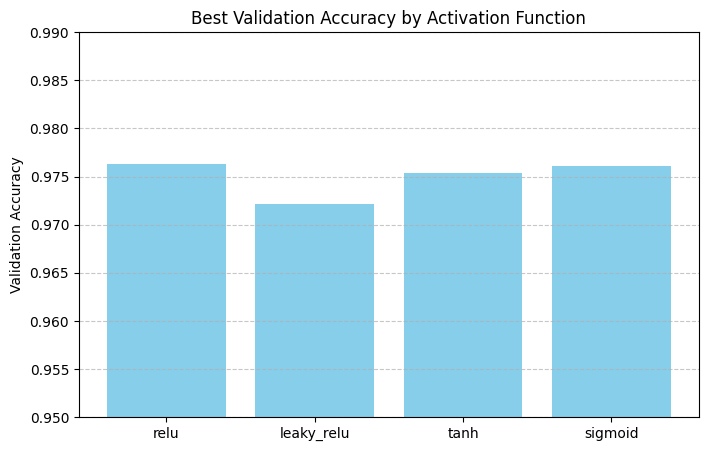

In [37]:
final_accs = [max(hist.history['val_accuracy']) for hist in activation_results]

plt.figure(figsize=(8,5))
plt.bar(activation_functions, final_accs, color="skyblue")
plt.title("Best Validation Accuracy by Activation Function")
plt.ylabel("Validation Accuracy")
plt.ylim(0.95, 0.99)   
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### relu is the highest

## Try different batch sizes and Normalize

In [38]:
from tensorflow.keras.layers import BatchNormalization
batch_sizes=[8, 16, 32, 64, 128, 256, 512]
batch_size_results=[]
for batch_size in batch_sizes:
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(128, activation= "relu"))
    model.add(BatchNormalization())
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    history= history = model.fit(X_train,y_train,
                                 epochs=10,
                                 validation_split=0.2,
                                 callbacks=[earlyStopping,best_model],
                                 verbose=0,
                                 batch_size=batch_size)
    batch_size_results.append(history)
    print(f"Done batch size={batch_size}")


Done batch size=8
Done batch size=16
Done batch size=32
Done batch size=64
Done batch size=128
Done batch size=256
Done batch size=512


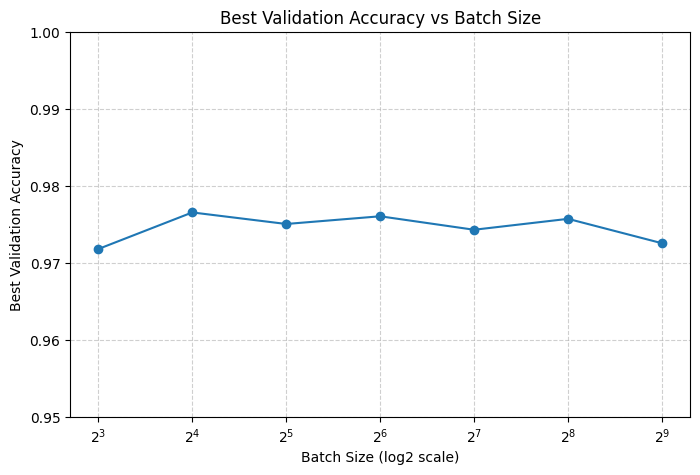

In [40]:


best_val_accs = [max(hist.history['val_accuracy']) for hist in batch_size_results]


plt.figure(figsize=(8,5))
plt.plot(batch_sizes, best_val_accs, marker='o', linestyle='-')
plt.xscale('log', base=2)  
plt.xlabel("Batch Size (log2 scale)")
plt.ylabel("Best Validation Accuracy")
plt.title("Best Validation Accuracy vs Batch Size")
plt.ylim(0.95, 1.0)       
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [41]:
print("Batch Size | Best Validation Accuracy")
print("-"*35)
for bs, hist in zip(batch_sizes, batch_size_results):
    best_acc = max(hist.history['val_accuracy'])
    print(f"{bs:>9} | {best_acc:.4f}")


Batch Size | Best Validation Accuracy
-----------------------------------
        8 | 0.9718
       16 | 0.9766
       32 | 0.9751
       64 | 0.9761
      128 | 0.9743
      256 | 0.9758
      512 | 0.9726


### 16 is the best

## Regularization to prevent overfitting

In [43]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation= "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    
history= history = model.fit(X_train,y_train,
                                 epochs=10,
                                 validation_split=0.2,
                                 callbacks=[earlyStopping,best_model],
                                 batch_size=16)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8646 - loss: 0.4410 - val_accuracy: 0.9550 - val_loss: 0.1477
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9409 - loss: 0.1934 - val_accuracy: 0.9597 - val_loss: 0.1367
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9531 - loss: 0.1534 - val_accuracy: 0.9662 - val_loss: 0.1142
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9616 - loss: 0.1283 - val_accuracy: 0.9707 - val_loss: 0.0923
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9624 - loss: 0.1221 - val_accuracy: 0.9707 - val_loss: 0.0988
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9674 - loss: 0.1071 - val_accuracy: 0.9726 - val_loss: 0.0929
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9684 - loss: 0.1008 - val_accuracy: 0.9748 - val_loss: 0.0871
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9707 - loss: 0

## Hyperparameter Tuning using CV

In [51]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def create_model(nl=1, nn=128, optimizer='adam', dropout=0.1):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    for _ in range(nl):
        model.add(Dense(nn, activation="relu"))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0)

params = dict(
    model__nl=[1, 2, 3],
    model__nn=[128, 256, 512],
    model__optimizer=['adam', 'sgd'],
    model__dropout=[0.0,0.1,0.2],
    batch_size=[16],
    epochs=[5,10]
)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=10,
    cv=3,
    verbose=2
)

random_search.fit(X_train, y_train)

print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=3, model__nn=128, model__optimizer=adam; total time= 2.0min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=3, model__nn=128, model__optimizer=adam; total time= 2.0min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=3, model__nn=128, model__optimizer=adam; total time= 2.0min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=1, model__nn=512, model__optimizer=adam; total time= 2.2min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=1, model__nn=512, model__optimizer=adam; total time= 2.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=1, model__nn=512, model__optimizer=adam; total time= 2.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.1, model__nl=3, model__nn=256, model__optimizer=adam; total time= 1.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.1, model__nl=3, model__nn=256, model__optimizer=adam; total time= 1.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.1, model__nl=3, model__nn=256, model__optimizer=adam; total time= 1.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.0, model__nl=3, model__nn=256, model__optimizer=sgd; total time=  55.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.0, model__nl=3, model__nn=256, model__optimizer=sgd; total time=  54.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.0, model__nl=3, model__nn=256, model__optimizer=sgd; total time=  53.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.0, model__nl=3, model__nn=128, model__optimizer=sgd; total time= 1.4min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.0, model__nl=3, model__nn=128, model__optimizer=sgd; total time= 1.4min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.0, model__nl=3, model__nn=128, model__optimizer=sgd; total time= 1.4min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.1, model__nl=2, model__nn=256, model__optimizer=sgd; total time=  50.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.1, model__nl=2, model__nn=256, model__optimizer=sgd; total time=  49.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.1, model__nl=2, model__nn=256, model__optimizer=sgd; total time=  49.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.0, model__nl=1, model__nn=256, model__optimizer=sgd; total time= 1.2min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.0, model__nl=1, model__nn=256, model__optimizer=sgd; total time= 1.2min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.0, model__nl=1, model__nn=256, model__optimizer=sgd; total time= 1.2min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=1, model__nn=512, model__optimizer=sgd; total time= 1.4min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=1, model__nn=512, model__optimizer=sgd; total time= 1.4min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=10, model__dropout=0.1, model__nl=1, model__nn=512, model__optimizer=sgd; total time= 1.4min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.2, model__nl=1, model__nn=128, model__optimizer=adam; total time=  45.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.2, model__nl=1, model__nn=128, model__optimizer=adam; total time=  47.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.2, model__nl=1, model__nn=128, model__optimizer=adam; total time=  48.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.2, model__nl=1, model__nn=512, model__optimizer=sgd; total time=  46.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.2, model__nl=1, model__nn=512, model__optimizer=sgd; total time=  47.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=16, epochs=5, model__dropout=0.2, model__nl=1, model__nn=512, model__optimizer=sgd; total time=  46.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best: 0.975383 using {'model__optimizer': 'sgd', 'model__nn': 512, 'model__nl': 1, 'model__dropout': 0.1, 'epochs': 10, 'batch_size': 16}


## Testing

In [54]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation= "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    
history= history = model.fit(X_train,y_train,
                                 epochs=20,
                                 validation_split=0.1,
                                 callbacks=[earlyStopping,best_model],
                                 batch_size=16)


Epoch 1/20
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8678 - loss: 0.4307 - val_accuracy: 0.9648 - val_loss: 0.1188
Epoch 2/20
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9463 - loss: 0.1789 - val_accuracy: 0.9712 - val_loss: 0.1002
Epoch 3/20
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9542 - loss: 0.1495 - val_accuracy: 0.9737 - val_loss: 0.0912
Epoch 4/20
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9588 - loss: 0.1300 - val_accuracy: 0.9750 - val_loss: 0.0824
Epoch 5/20
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9659 - loss: 0.1105 - val_accuracy: 0.9787 - val_loss: 0.0773
Epoch 6/20
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9697 - loss: 0.0989 - val_accuracy: 0.9795 - val_loss: 0.0752
Epoch 7/20
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9700 - loss: 0.0957 - val_accuracy: 0.9793 - val_loss: 0.0737
Epoch 8/20
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9711 - loss: 0

Test accuracy: 0.9793
Test loss: 0.0740
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



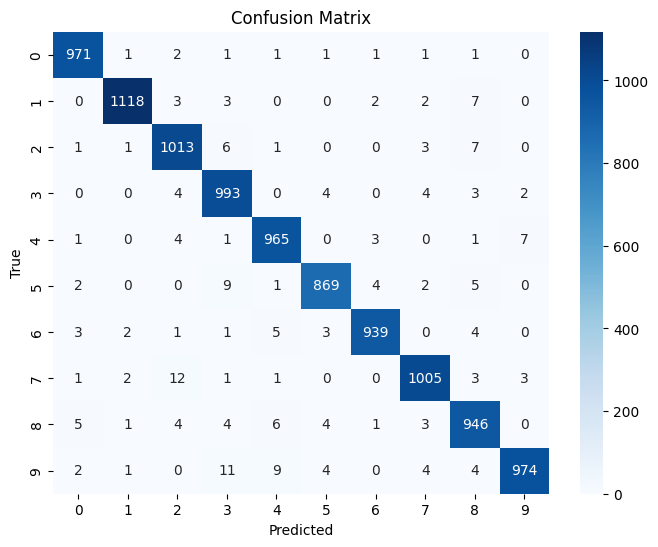

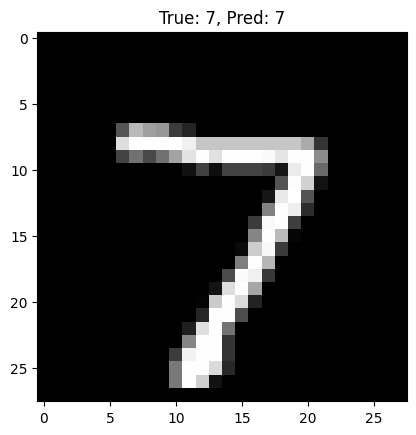

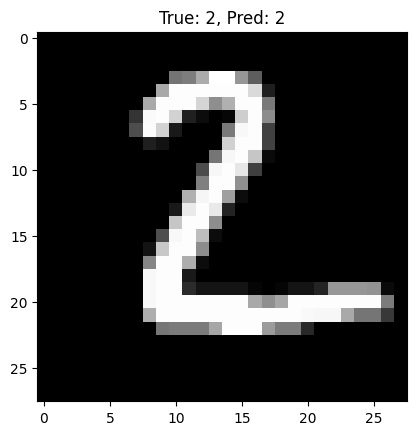

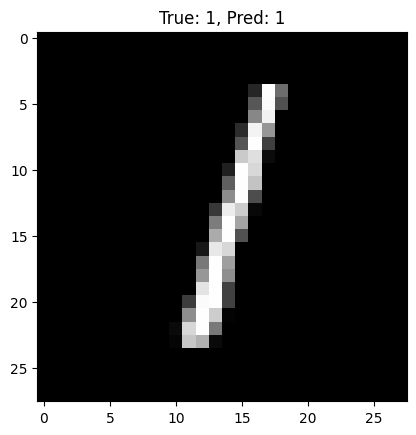

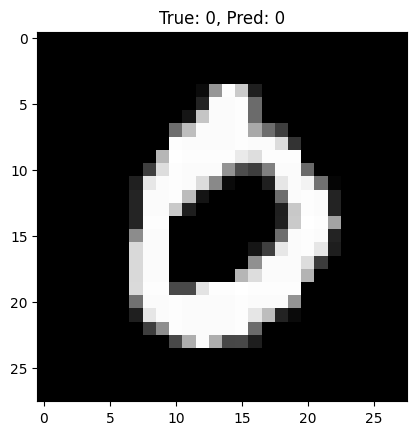

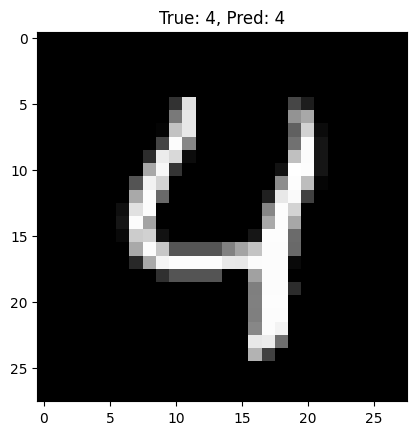

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# ✅ Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)   # pick highest probability class
y_true = y_test                            # already integer labels

# ✅ Classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# ✅ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ✅ Show sample predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_true[i]}, Pred: {y_pred[i]}")
    plt.show()
